# Overview of the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import folium
from folium import plugins
import matplotlib
from matplotlib import pyplot as plt
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [3]:
nyc_data = pd.read_csv("/data/bikeshare/data/unified/nyc.csv")
boston_data = pd.read_csv("/data/bikeshare/data/unified/boston.csv")
main_data = pd.read_csv("/data/bikeshare/data/unified/merged.csv")

In [4]:
nyc = {'name':'New York City', 'data':nyc_data, 'ref':'nyc'}
boston = {'name':'Boston', 'data':boston_data, 'ref':'bos'}
main = {'name':'All Data', 'data':main_data, 'ref':'all'}

## Gender and gender by usertype distribution

In [51]:
def riders_by_gender(data):
    gender = data['data'].gender
    gender_plot = sns.countplot(x = 'gender', data=data['data'])
    plt.savefig('../images/1/_duration_distribution_by_gender'+data['ref']+'.png')

In [52]:
def gender_by_user_type(data):
    gender_by_usertype = sns.countplot(x = 'user_type', hue = 'gender', data = data['data'])
    

__New York City__

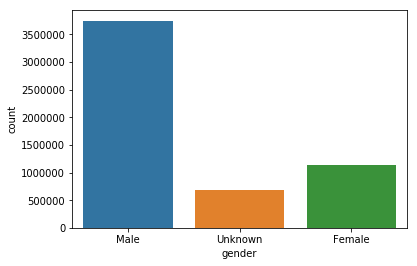

In [53]:
riders_by_gender(nyc)

__Boston__

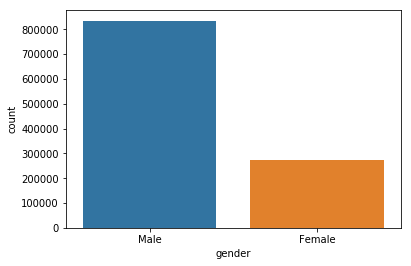

In [54]:
riders_by_gender(boston)

Throughout the bar plot, we can easily observe that the number of the make bikeshare is higher third times as that of the female bikeshare. Moreover, all female and male are subscriber (annual member) and all unknown people are customer (24-hour pass or 3-day pass user - non-member).

## Gender of Users (Percentage)
How does bikeshare service usage differ by gender?

In [12]:
def users_by_gender(data):
    x = data['data'].gender.value_counts().index
    y = data['data'].gender.value_counts()
    count = data['data'].gender.count()
    plt.bar(x, y/count)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.ylabel("Ratio out of {} riders".format(count))
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.savefig('../images/1/users_by_gender_'+data['ref']+'.png')
    plt.show()
    

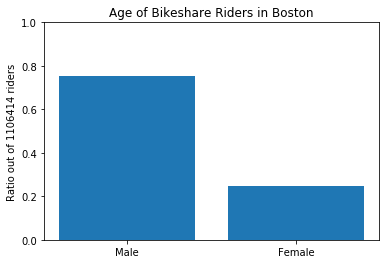

In [13]:
users_by_gender(boston)

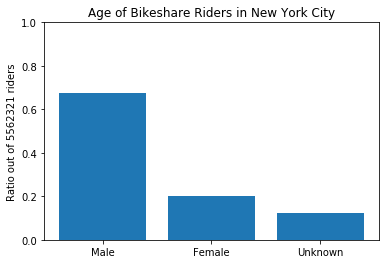

In [14]:
users_by_gender(nyc)

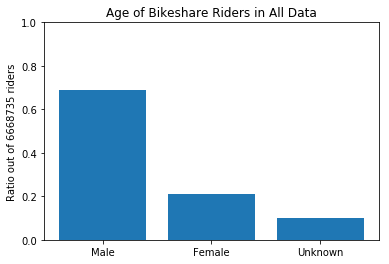

In [15]:
users_by_gender(main)

Male ridership seems to be higher in Boston compared to NYC where male ridership is 80% with females being under 20%. In NYC, male ridership is a little above 60% and female ridership is also higher above 20%.

## Distribution of Trip Duration

In [16]:
# How many trips went from Station A all the way to Station A
# New York City
totalTrips = len(nyc_data)
same_station = nyc_data[nyc_data.start_station == nyc_data.end_station]
tripDuration = same_station['duration']
print ('Total number of trips of New York Bikeshare: {:,}'.format(totalTrips))
print (('Trips from A -> A: {:,}').format(len(same_station)))
print (('Trips from A -> A: {:.1%}').format(len(same_station) / totalTrips))
    

Total number of trips of New York Bikeshare: 5,562,321
Trips from A -> A: 137,027
Trips from A -> A: 2.5%


In [17]:
# How many trips went from Station A all the way to Station A
# Boston
totalTrips1 = len(boston_data)
same_station1 = boston_data[boston_data.start_station == boston_data.end_station]
tripDuration1 = same_station['duration']
print ('Total number of trips of Boston Bikeshare: {:,}'.format(totalTrips1))
print (('Trips from A -> A: {:,}').format(len(same_station1)))
print (('Trips from A -> A: {:.1%}').format(len(same_station1) / totalTrips1))
    

Total number of trips of Boston Bikeshare: 1,579,025
Trips from A -> A: 76,311
Trips from A -> A: 4.8%


In [18]:
# General distribution information about trip duration in New York City
tripDuration = same_station['duration']
tripDuration.describe()

count    137027.000000
mean         23.085907
std          70.636620
min           1.000000
25%           3.250000
50%          12.983333
75%          28.966667
max       10019.616667
Name: duration, dtype: float64

In [19]:
# General distribution information about trip duration in New York City
tripDuration1 = same_station1['duration']
tripDuration1.describe()

count    7.631100e+04
mean     3.247803e+03
std      1.445736e+04
min      0.000000e+00
25%      5.400000e+02
50%      1.527000e+03
75%      3.474000e+03
max      2.645243e+06
Name: duration, dtype: float64

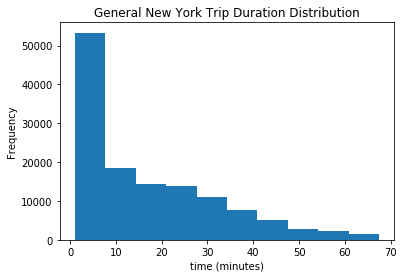

In [24]:
# check out trip in minutes distribution
# New York City
tripDuration[tripDuration < tripDuration.quantile(.95)].plot(kind='hist')
plt.xlabel('time (minutes)')
plt.title('General New York Trip Duration Distribution')
plt.savefig('../images/1/general_ny_duration_distribution_'+nyc['ref']+'.png')

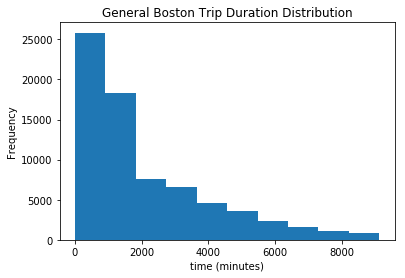

In [26]:
# check out trip in minutes distribution
# Boston
tripDuration1[tripDuration1 < tripDuration1.quantile(.95)].plot(kind='hist')
plt.xlabel('time (minutes)')
plt.title('General Boston Trip Duration Distribution')
plt.savefig('../images/1/general_boston_duration_distribution_'+boston['ref']+'.png')

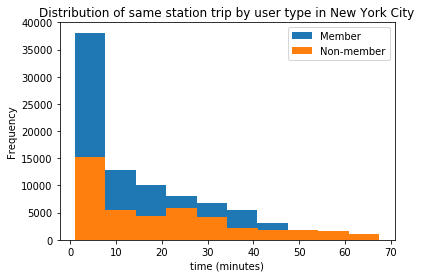

In [28]:
# distribution grouped by subscriber type
# New York City
same_station[tripDuration < tripDuration.quantile(.95)].groupby('user_type')['duration'].plot(kind='hist', stacked=True, legend=True)
plt.xlabel('time (minutes)')
plt.title('Distribution of same station trip by user type in New York City')
plt.savefig('../images/1/ny_duration_distribution_by_usertype_'+nyc['ref']+'.png')

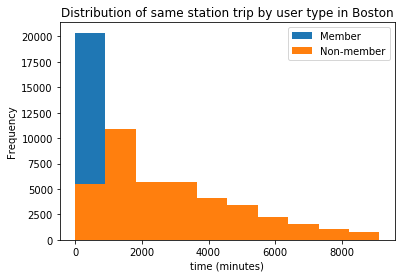

In [29]:
# distribution grouped by subscriber type
# Boston
same_station1[tripDuration1 < tripDuration1.quantile(.95)].groupby('user_type')['duration'].plot(kind='hist', stacked=True, legend=True)
plt.xlabel('time (minutes)')
plt.title('Distribution of same station trip by user type in Boston')
plt.savefig('../images/1/boston_duration_distribution_by_usertype_'+boston['ref']+'.png')

The first 30 minutes of each ride are included in the price of the pass, and you can take as many rides as you want while your pass is active. If you keep a bike out for more than 30 minutes at a time, it's an extra $4 per additional 15 minutes. Therefore, I will look up for the distribution of trip duration less than 30 minutes.

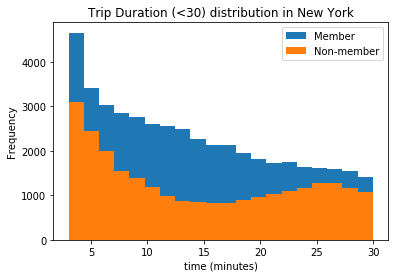

In [49]:
# New york City
same_station[same_station['duration'] < 30] \
    .groupby('user_type')['duration'] \
    .plot(kind='hist', stacked=True, legend=True, bins=20)
plt.xlabel('time (minutes)')
plt.title('Trip Duration (<30) distribution in New York')
plt.savefig('../images/1/nyc_duration_distribution_<30'+nyc['ref']+'.png')

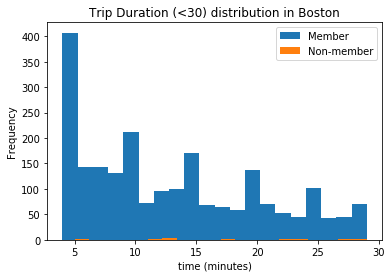

In [50]:
# Boston
same_station1[same_station1['duration'] < 30] \
    .groupby('user_type')['duration'] \
    .plot(kind='hist', stacked=True, legend=True, bins=20)
plt.xlabel('time (minutes)')
plt.title('Trip Duration (<30) distribution in Boston')
plt.savefig('../images/1/boston_duration_distribution_<30_'+boston['ref']+'.png')

We notice that lots of trip duration are less than 3 minutes. We can regard less than three-minute trip duration is the accidental checkouts.

In [31]:
# Approximate the number of accidental checkouts
# New York
old_count = len(same_station)
same_station = same_station[same_station.duration >3]
new_count = len(same_station)
accidental_checkout = old_count - new_count
print('The number of accidental checkouts in New York is about {}'.format(accidental_checkout))

The number of accidental checkouts in New York is about 32668


In [32]:
# Approximate the number of accidental checkouts
# Boston
old_count = len(same_station1)
same_station1 = same_station1[same_station1.duration >3]
new_count = len(same_station1)
accidental_checkout = old_count - new_count
print('The number of accidental checkouts in Boston is about {}'.format(accidental_checkout))

The number of accidental checkouts in Boston is about 4751


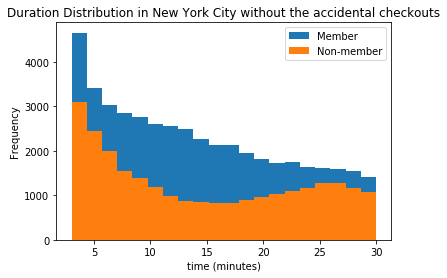

In [34]:
# Examine the < 30 minutes trip duration again after dropping the accidental checkouts
# New York City
same_station[same_station['duration'] < 30] \
    .groupby('user_type')['duration'] \
    .plot(kind='hist', stacked=True, legend=True, bins=20)
plt.xlabel('time (minutes)')
plt.title('Duration Distribution in New York City without the accidental checkouts')
plt.savefig('../images/1/ny_duration_distribution_without_accidentalcheckouts_'+nyc['ref']+'.png')

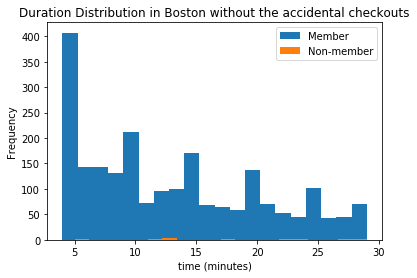

In [37]:
# Examine the < 30 minutes trip duration again after dropping the accidental checkouts
# Boston
same_station1[same_station1['duration'] < 30] \
    .groupby('user_type')['duration'] \
    .plot(kind='hist', stacked=True, legend=True, bins=20)
plt.xlabel('time (minutes)')
plt.title('Duration Distribution in Boston without the accidental checkouts')
plt.savefig('../images/1/boston_duration_distribution_without_accidentalcheckouts_'+boston['ref']+'.png')

__Analysis__ <br>
Through the graphs of New York City and Bostion duration distribution without accidental checkouts, we observe that there are few people who are non-members rent the bikeshare with duration time less than 30 minutes while lots people in New York City rent the bikeshare with duration time less than 30 minutes (both members and non-members). However, the range of duration time between New York City and Boston varies a lot: New York City is from 0 to 70 (minutes) and Boston is from 0 - 9000 (minutes). It means that people often rent the bike day by day (short time) in New York City while people in Boston often rent the bike for a whole week (they regard bike as the main vehicle). Therefore, we can see in the graphs that the user type of poeple in Boston are annual member while that in New York varies between subscriber and customer a lot.

## Users by Age
How does bikeshare service usage differ by age?

In [42]:
def users_by_age(data):
    age_counts = (2018 - data['data'].birth_year).value_counts()
    axes = plt.gca()
    axes.set_xlim([18,80])
    plt.bar(age_counts.index, age_counts)
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.show()
    plt.savefig('../images/1/duration_distribution_by_age_'+data['ref']+'.png')

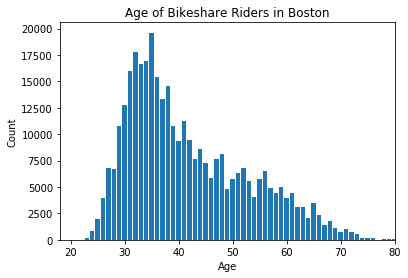

<Figure size 432x288 with 0 Axes>

In [43]:
users_by_age(boston)

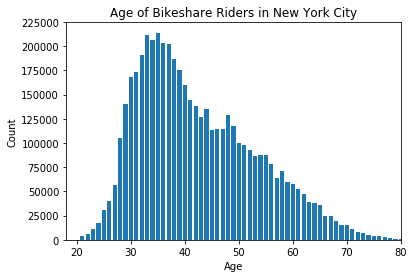

<Figure size 432x288 with 0 Axes>

In [44]:
users_by_age(nyc)

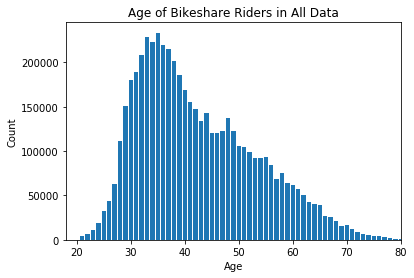

<Figure size 432x288 with 0 Axes>

In [45]:
users_by_age(main)

In [46]:
# Distribution of age
(2018 - main_data.birth_year).describe()

count    5.232128e+06
mean     4.240304e+01
std      1.105295e+01
min      2.100000e+01
25%      3.400000e+01
50%      4.000000e+01
75%      5.000000e+01
max      1.190000e+02
Name: birth_year, dtype: float64

__Analysis__ <br>
Taking a closer look at the main data. We can see that the distribution of age is skewed to the right. The majority of the users are between their 30s-50s. A reason for the use of bicycles for the current demographic could be 2 reasons in my opinion:
1. As people earn more, they stray away from bicycles. Hence people with higher median earnings (who generally tend to be older, could use other means of transportation)
2. While the bicycles are cheaper than taxis and ride hailing apps, they are more expensive than the metro in NYC or Boston. Demographics with a lower income, generally <20 year olds could use the metro otherwise.

